Pytorch is by default in Colab
import the other important libraries

In [1]:
import torch
import numpy as np
import seaborn as sns
import urllib
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
from sklearn.datasets import fetch_openml
data = fetch_openml(data_id=42165, return_X_y=False, as_frame=True)
print(data.DESCR)
print(data.feature_names)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [3]:
data_ames = pd.DataFrame(data.data, columns=data.feature_names)
data_ames['SalePrice'] = data.target

In [4]:
data_ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null float64
MSSubClass       1460 non-null float64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null float64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null float64
OverallCond      1460 non-null float64
YearBuilt        1460 non-null float64
YearRemodAdd     1460 non-null float64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st  

Some descriptive statistics could be useful
mean, std, percentile etc.

In [5]:
data_ames.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Let's check unique vallues in the categorical variables. If this is too high, we can't use an ordinal/one-hot encoding.

In [6]:
cat_columns = data_ames.select_dtypes(include='object').columns
ames_unique = pd.Series(index=list(cat_columns))
for col in data_ames.select_dtypes(include='object').columns:
    ames_unique[col] = len(data_ames[col].unique())

ames_unique

MSZoning          5.0
Street            2.0
Alley             3.0
LotShape          4.0
LandContour       4.0
Utilities         2.0
LotConfig         5.0
LandSlope         3.0
Neighborhood     25.0
Condition1        9.0
Condition2        8.0
BldgType          5.0
HouseStyle        8.0
RoofStyle         6.0
RoofMatl          8.0
Exterior1st      15.0
Exterior2nd      16.0
MasVnrType        5.0
ExterQual         4.0
ExterCond         5.0
Foundation        6.0
BsmtQual          5.0
BsmtCond          5.0
BsmtExposure      5.0
BsmtFinType1      7.0
BsmtFinType2      7.0
Heating           6.0
HeatingQC         5.0
CentralAir        2.0
Electrical        6.0
KitchenQual       4.0
Functional        7.0
FireplaceQu       6.0
GarageType        7.0
GarageFinish      4.0
GarageQual        6.0
GarageCond        6.0
PavedDrive        3.0
PoolQC            4.0
Fence             5.0
MiscFeature       5.0
SaleType          9.0
SaleCondition     6.0
dtype: float64

This looks fine. We can use one of the two encoding schemes.

let's see the target!

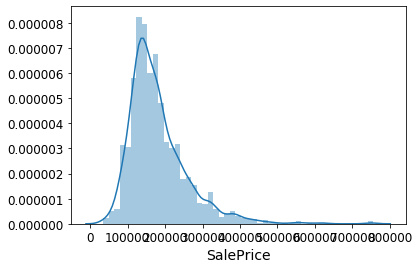

In [7]:
sns.distplot(data_ames['SalePrice'])

In [8]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [9]:
import dython.nominal

In [10]:
assoc = dython.nominal.associations(data_ames, plot=False)
corr = assoc['corr']

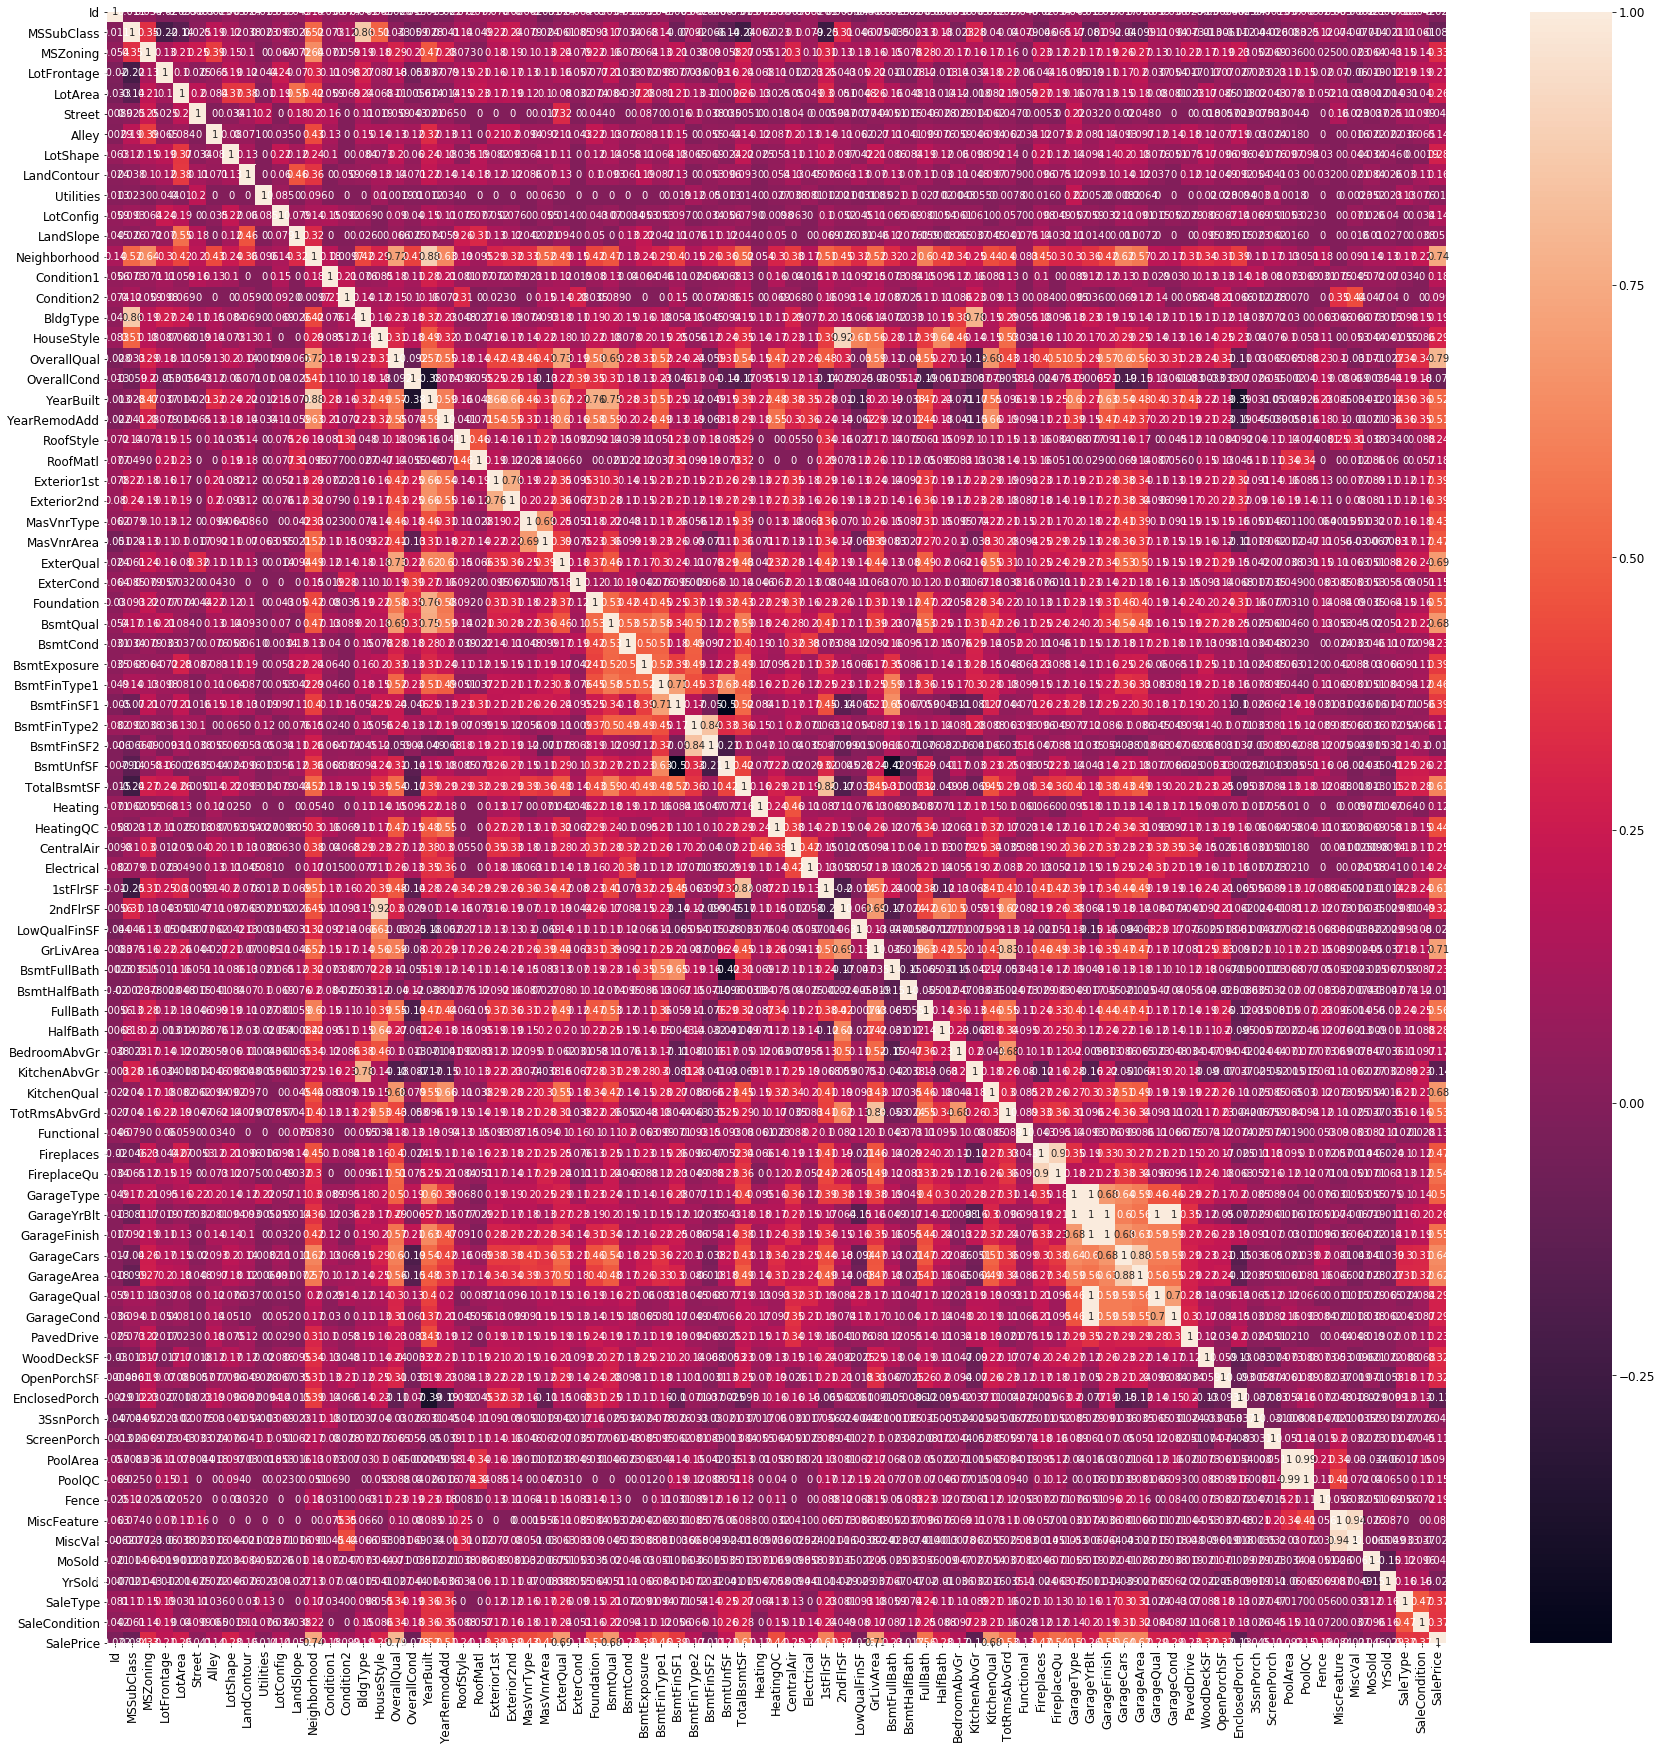

In [11]:
plt.figure(figsize=(30, 30))
sns.heatmap(data=corr, annot=True)

Now we can extract the most correlated variables:

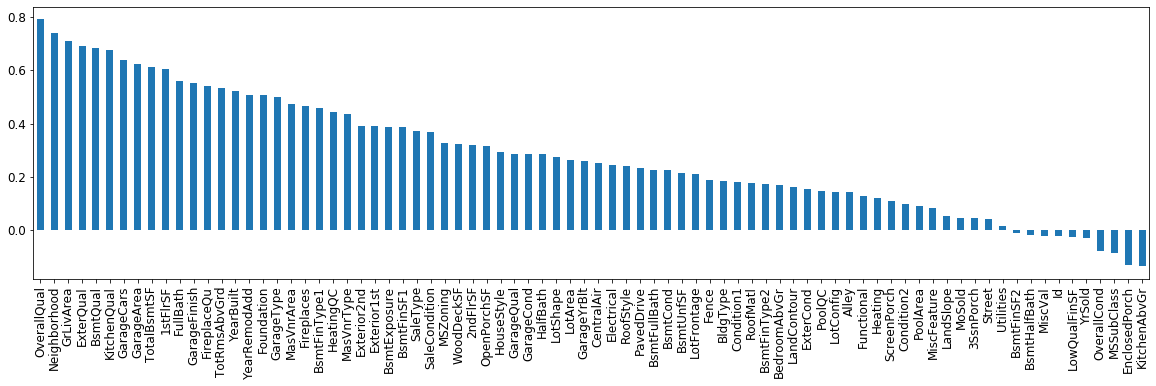

In [12]:
corr['SalePrice'].sort_values(ascending=False)[1:].plot.bar(figsize=(20, 5))

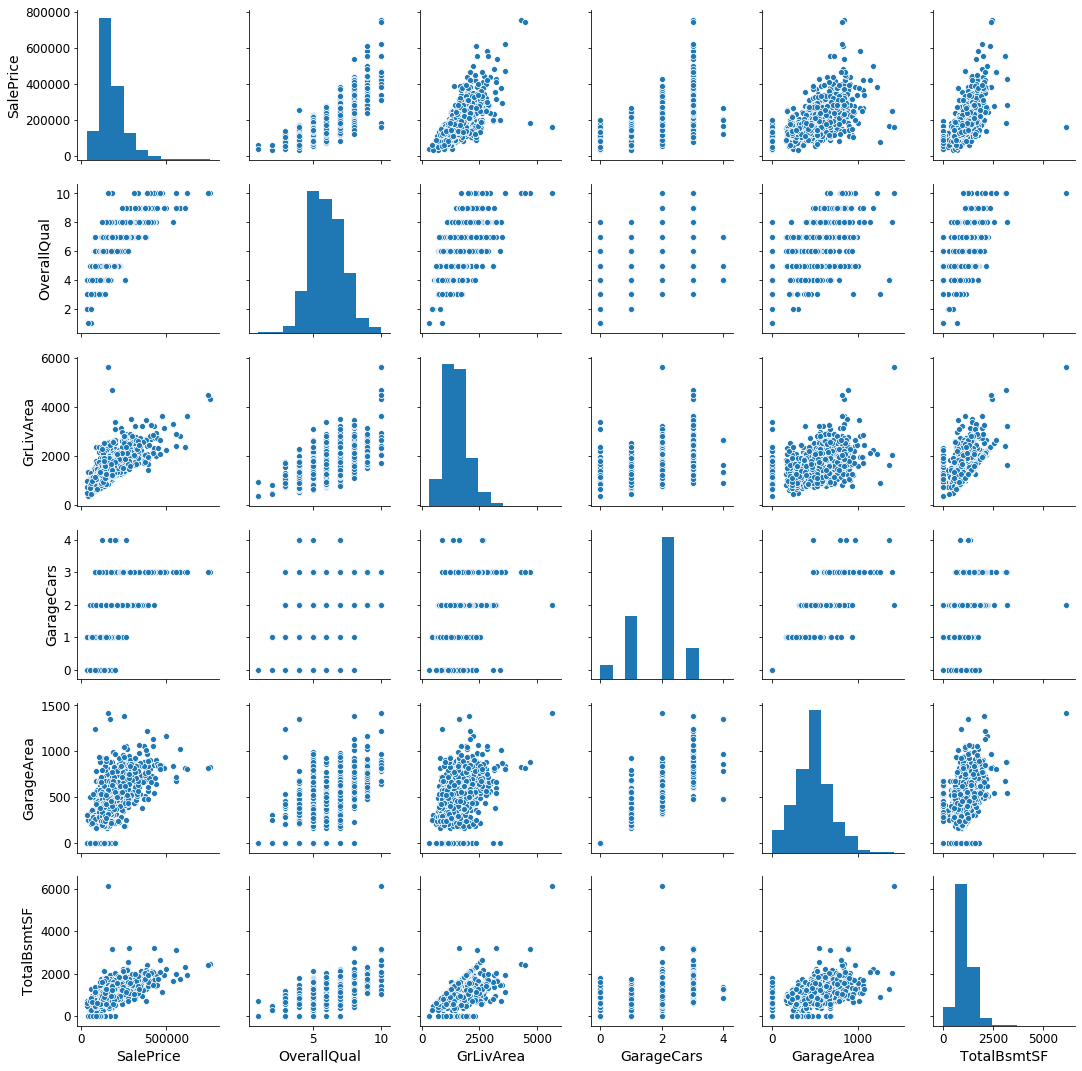

In [13]:
# pairplot of the variables most correlated with the target

top_corr_cols = list(corr['SalePrice'].sort_values(ascending=False).head(10).index)
g = sns.pairplot(data_ames[top_corr_cols], palette='husl' )

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy


def lift_chart(y_true, y_pred, bins=10, ax=None, normalize=False, labels=None):
    '''Given matched vectors of true versus predicted
    targets, plot them against each other.
    
    This can be useful for comparing predictions vs targets
    across the whole spectrum. Often a model fits well to
    the mid-range, however, does poorly in the extremes. This
    plot can help spot these problems.
    
    The plot is inspired by Datarobot's lift chart visualization:
    https://twitter.com/hackathorn/status/868136907301146624    
    
    Parameters:
    -----------
    y_true : target values for model
    y_pred : predicted values
    bins : number of bins
    ax : axis, if the lift chart is to be included
      in an existing figure
    normalize : if y_true and y_pred should be (z-)normalized. This
      can be useful to look at variable correlations, where the
      variables can have a different scale.
    labels : the labels to show in the legend/colorbar.
    
    Returns:
    --------
    corr : the Spearman correlation between predicted and actual targets.
    
    Example:
    --------
    >> a = np.random.randn(10000)
    >> lift_chart(a, np.random.randn(10000) * 0.9 + a, bins=100)
    '''    
    if isinstance(y_true, (pd.Series, pd.DataFrame)):
        y_true = y_true.values
    if isinstance(y_pred, (pd.Series, pd.DataFrame)):
        y_pred = y_pred.values

    if normalize:
        y_pred = scipy.stats.zscore(y_pred)
        y_true = scipy.stats.zscore(y_true)
    means, _, _ = scipy.stats.binned_statistic(
        y_true, [y_true, y_pred], bins=bins
    )
    for i, l_mean in enumerate(means):
        if labels is None:
            label='target' if i == 0 else 'pred %d' % i
        else:
            label = labels[i]
        ax = sns.lineplot(
            range(bins), l_mean, label=label,
            ax=ax
        )
    ax.set(xlabel='Target Ranking', ylabel='Target')
    box = ax.get_position()
    ax.legend(
        bbox_to_anchor=(0.3, 0.99),
        ncol=1,     
    )
    print(scipy.stats.spearmanr(y_true, y_pred))
    return ax

# Prepare the data for Machine Learning algorithms

* Data cleaning
    * Separate predictors and the label
    * Missing values
        * Get rid of the corresponding values.
        * Get rid of the whole attribute.
        * Set the values to some value (zero, the mean, the median, etc.).
            * If imputation is chosen, the median or other statistic should be computed on the training set as it will be used to fill the missing values in the training set, it should be saved. This will be needed later to replace missing values in the test set when the system evaluation is to be done and also once the system goes live to replace missing values in new data.

In [1]:
!pip install category-encoders

In [15]:
from sklearn.model_selection import train_test_split
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

np.random.seed(12)
num_cols = list(data_ames.select_dtypes(include='float'))
cat_cols = list(data_ames.select_dtypes(include='object'))

ordinal_encoder = OrdinalEncoder().fit(data_ames[cat_cols])
standard_scaler = StandardScaler().fit(data_ames[num_cols])

X = pd.DataFrame(
    data=np.column_stack([
        ordinal_encoder.transform(data_ames[cat_cols]),
        standard_scaler.transform(data_ames[num_cols])
    ]),
    columns=cat_cols + num_cols
)

In [16]:
X.shape

(1460, 81)

In [17]:
bins = 5
sale_price_bins = pd.qcut(X['SalePrice'], q=bins, labels=list(range(bins)))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(columns='SalePrice'),
    X['SalePrice'],
    random_state=12,
    stratify=sale_price_bins
)

In [20]:
print(X_train.size)
print(y_train.size)

87600
1095


In [21]:
X_train['Alley'].dtype

dtype('float64')

**Embeddings**

This section introduces the concept of embeddings. Embeddings are methods to map discrete-cateogorical variables to continuous vectors. In the context of neural networks, the embeddings are representation of values to lower dimensional representation using the Neural network architecture. 

PyTorch provides a method to convert the variable.  https://pytorch.org/docs/stable/nn.html#embedding

Implement a pytorch model with batch inputs using PyTorch.

* Prepare the data (Convert into Torch Tensor)
* Define the model
* Define the loss criteria and optimizer
* Make a DataLoader for batches
* Implement the neural network 

In [23]:
num_features = list(set(num_cols) - set(['SalePrice']))

In [24]:
device = torch.device('cuda')
torch.backends.cudnn.benchmark = True

In [25]:
from torch.autograd import Variable 

X_train_num_pt = Variable(torch.cuda.FloatTensor(X_train[num_features].values))
X_train_cat_pt = Variable(torch.cuda.LongTensor(X_train[cat_cols].values))
y_train_pt = Variable(torch.cuda.FloatTensor(y_train.values)).view(-1, 1)
X_test_num_pt = Variable(torch.cuda.FloatTensor(X_test[num_features].values))
X_test_cat_pt = Variable(torch.cuda.LongTensor(X_test[cat_cols].values).long())
y_test_pt = Variable(torch.cuda.FloatTensor(y_test.values)).view(-1, 1)

In [26]:
print(X_train_num_pt.shape)
print(X_train_cat_pt.shape)
print(y_train_pt.shape)
print(X_test_num_pt.shape)
print(X_test_cat_pt.shape)
print(y_test_pt.shape)

torch.Size([1095, 37])
torch.Size([1095, 43])
torch.Size([1095, 1])
torch.Size([365, 37])
torch.Size([365, 43])
torch.Size([365, 1])


In [27]:
[X[col].min() for col in cat_cols]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [29]:
class RegressionModel(torch.nn.Module): 
  
    def __init__(self, X, num_cols, cat_cols, device=torch.device('cuda'), embed_dim=2, hidden_layer_dim=2, p=0.5): 
        super(RegressionModel, self).__init__() 
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self.embed_dim = embed_dim
        self.hidden_layer_dim = hidden_layer_dim
        
        self.embeddings = [
            torch.nn.Embedding(
                num_embeddings=len(X[col].unique()),
                embedding_dim=embed_dim
            ).to(device)
            for col in cat_cols
        ]
        hidden_dim = len(num_cols) + len(cat_cols) * embed_dim,
        
        # hidden layer
        self.hidden = torch.nn.Linear(torch.IntTensor(hidden_dim), hidden_layer_dim).to(device)
        self.dropout_layer = torch.nn.Dropout(p=p).to(device)
        self.hidden_act = torch.nn.ReLU().to(device)
        
        # output layer
        self.output = torch.nn.Linear(hidden_layer_dim, 1).to(device)
    
    def forward(self, num_inputs, cat_inputs):
        '''Forward method with two input variables -
        numeric and categorical.
        '''
        cat_x = [
            torch.squeeze(embed(cat_inputs[:, i] - 1))
            for i, embed in enumerate(self.embeddings)
        ]
        x = torch.cat(cat_x + [num_inputs], dim=1)
        x = self.hidden(x)
        x = self.dropout_layer(x)
        x = self.hidden_act(x)
        y_pred = self.output(x)
        return y_pred

house_model = RegressionModel(data_ames, num_features, cat_cols)
assert len(house_model.cat_cols) == len(house_model.embeddings)
assert len(house_model.cat_cols) + len(house_model.num_cols) == X_train.shape[1]

In [30]:
torch.cuda.is_available()

True

In [31]:
house_model.to(device)

RegressionModel(
  (hidden): Linear(in_features=tensor([123], dtype=torch.int32), out_features=2, bias=True)
  (dropout_layer): Dropout(p=0.5, inplace=False)
  (hidden_act): ReLU()
  (output): Linear(in_features=2, out_features=1, bias=True)
)

Define a loss criteria and the optimizer for the network. We have taken the mean square error as the losss (MSE) and stochastic gradient descent as our optimization algorithm. The following could be used as optimizers along with the parameters

```
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.6)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.1)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.8, 0.98))

```

In [32]:
criterion = torch.nn.MSELoss().to(device)
optimizer = torch.optim.SGD(house_model.parameters(), lr=0.001)

In [33]:
X_train.shape

(1095, 80)

Impelement a DataLoader to input a batch of data at a time. PyTorch provides a DataLoader for this

In [34]:
from tqdm.notebook import tqdm, trange

data_batch = torch.utils.data.TensorDataset(X_train_num_pt, X_train_cat_pt, y_train_pt)
dataloader = torch.utils.data.DataLoader(data_batch, batch_size=10, shuffle=True)

In [35]:
train_losses, test_losses  = [], [] 
n_epochs = 30
for epoch in trange(n_epochs): 
    train_loss, test_loss  = 0, 0
    for x_train_num_batch, x_train_cat_batch, y_train_batch in dataloader:
        # Forward pass: Predict y by passing x to the model 
        x_train_num_batch, x_train_cat_batch, y_train_batch = (
            x_train_num_batch.to(device),
            x_train_cat_batch.to(device),
            y_train_batch.to(device)
        )
        pred_ytrain = house_model.forward(
            x_train_num_batch, x_train_cat_batch
        )

        # Compute and print loss 
        loss = torch.sqrt(criterion(pred_ytrain, y_train_batch)) 

        # Zero gradients, perform a backward pass,  
        # and update the weights. 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step()
        train_loss += loss.item()
        with torch.no_grad():
            house_model.eval()
            pred_ytest = house_model.forward(X_test_num_pt, X_test_cat_pt)
            test_loss += torch.sqrt(criterion(pred_ytest, y_test_pt))

        train_losses.append(train_loss / len(dataloader))
        test_losses.append(test_loss / len(dataloader))

    if epoch % 10 == 0 :
        print(
            'Epoch: {}/{}\t'.format(epoch, 1000),
            'Training Loss: {:.3f}\t'.format(train_loss / len(dataloader)),
            'Test Loss: {:.3f}'.format(test_loss / len(dataloader))
        )

Epoch: 0/1000	 Training Loss: 1.026	 Test Loss: 1.041
Epoch: 10/1000	 Training Loss: 0.565	 Test Loss: 0.699
Epoch: 20/1000	 Training Loss: 0.379	 Test Loss: 0.677



Text(0, 0.5, 'MSE')

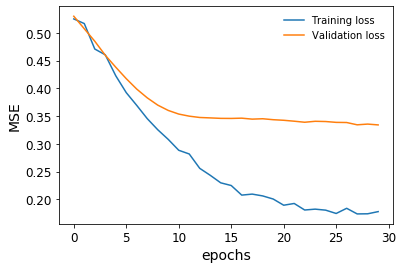

In [36]:
plt.plot(np.array(train_losses).reshape((n_epochs, -1)).mean(axis=1), label='Training loss')
plt.plot(np.array(test_losses).reshape((n_epochs, -1)).mean(axis=1), label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('epochs')
plt.ylabel('MSE')

SpearmanrResult(correlation=0.9128379874132446, pvalue=2.851301294354812e-143)


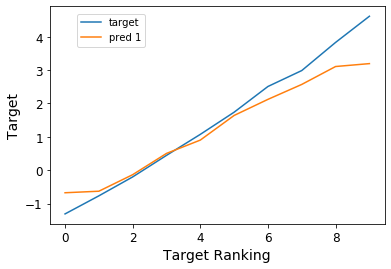

In [40]:
lift_chart(y_test, house_model(X_test_num_pt, X_test_cat_pt).data.cpu().numpy().squeeze(), bins=10)

**CAPTUM**

Captum is a tool which can let us understand the in and out of the neural network model learnt on the datasets. 
It can help in learning 
* Feature importance
* Layer importance
* Neuron Importance

This is very important in learning interpretable Neural networks. Here, Integrated Gradients have been applied to understand feature importance. Later Neuron importances have also been shown by using layer conductance method.
The details can be found in the original paper https://arxiv.org/pdf/1703.01365.pdf


In [ ]:
!pip install captum

In [37]:
from captum.attr import IntegratedGradients, LayerConductance, NeuronConductance

In [ ]:
#house_model(X_test_num_pt, X_test_cat_pt)

In [48]:
house_model.cpu()
for embedding in house_model.embeddings:
    embedding.cpu()

In [49]:
house_model.cpu()
ing_house = IntegratedGradients(forward_func=house_model.forward, )
#X_test_cat_pt.requires_grad_()
X_test_num_pt.requires_grad_()
attr, delta = ing_house.attribute(
    X_test_num_pt.cpu(),
    target=None,
    return_convergence_delta=True,
    additional_forward_args=X_test_cat_pt.cpu()
)
attr = attr.detach().numpy()

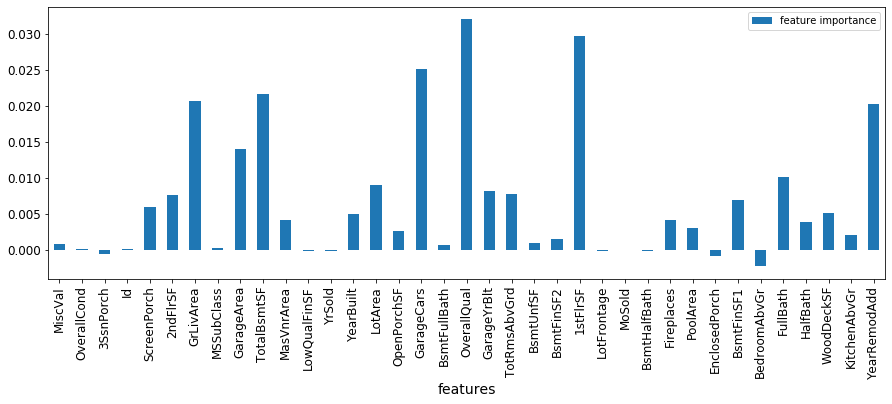

In [63]:
df_feat = pd.DataFrame(np.mean(attr, axis=0), columns=['feature importance'] )
df_feat['features'] = num_features
df_feat.plot.bar(x='features', y='feature importance', figsize=(15, 5))

In [62]:
df_feat.sort_values(by='feature importance', ascending=False).head(10)

,feature importance,features
18,0.032042,OverallQual
23,0.029772,1stFlrSF
16,0.025083,GarageCars
9,0.021611,TotalBsmtSF
6,0.020760,GrLivArea
36,0.020272,YearRemodAdd
8,0.014075,GarageArea
32,0.010145,FullBath
14,0.008996,LotArea
19,0.008246,GarageYrBlt


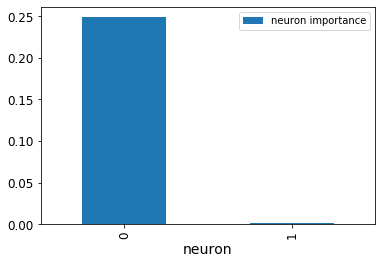

In [68]:
cond_layer1 = LayerConductance(house_model, house_model.hidden_act)
cond_vals = cond_layer1.attribute(
    X_test_num_pt.cpu(), target=None,
    additional_forward_args=X_test_cat_pt.cpu()

)
cond_vals = cond_vals.detach().numpy()
df_neuron = pd.DataFrame(data = np.mean(cond_vals, axis=0), columns=['neuron importance'])
df_neuron['neuron'] = range(house_model.hidden_layer_dim)
df_neuron.plot.bar(x='neuron', y='neuron importance')